# WeRateDogs Twitter Data Wrangling & Analysis

*by Awurigwe Joseph*

## Table of Contents

- <a href='#introduction'>Introduction</a>
- <a href='#gather'>Gathering</a>
- <a href='#assess'>Assessing The Data</a>
- <a href='#clean'>Cleaning The Data</a>
- <a href='#store'>Store</a>
- <a href='#analysis'>Exploratory Data Analysis</a>
- <a href='#conclusion'>Conclusion</a>
- <a href='#sources'>Sources</a>

<a id='Introduction'></a>
# Introduction

WeRateDogs is a Twitter account that posts and rates pictures of dogs. These ratings often are not serious and have numerators that are greater than the denominators. In this analysis, I will mostly focus on wrangling WeRateDogs's Twitter archive through August 1, 2017. Most of the necessary Twitter data has been provided by Udacity and includes information on each post, as well as details on each dog such as the name, rating, and stage (whether the dog is a doggo, floofer, pupper, or puppo). See below for definitions on the dog stages. However, not all of the desired data is present in Udacity's dataset, so I will also use the Twitter API to gather additional data.

I'll start the data wrangling by importing the packages to be used in the project

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline



<a id='gather'></a>
# Gathering

The first file is the 'twitter-archive-enhanced.csv' which was downloaded manually from udacity servers

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

#confirming success by checking head()
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The second dataset, the image prediction(image_prediction.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library

In [3]:
# image predictions URL provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(image_pred.content)

In [4]:
#reading the downloaded image prediction file to a dataframe
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

#confirming success with .head()
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The 'tweets-json.txt' was meant to be gotten by querying the twitter api but I couldn't get access to it, so I had to downnload the one already given in the classroom

In [5]:
#sorting through the tweets-json file
df_list = []
with open('tweets-json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
#reading the json into a dataframe
tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [54]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

<a id='access'></a>
# Accessing The Data

The next step involves accessing the gathered data, which will be done both visually and programatically

In [6]:
#Twitter Archive
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
#Image Predictions
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#Tweets data generated via tweepy
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


Programmatic Assessment

In [9]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
tweet_archive.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

In [12]:
tweet_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [13]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [14]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Observations
### Quality issues

1. The Timestamp column should be of the datetime format
2. Irrelevant Categories that needs to be dropped('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_stamps_user_id', 'retweeted_status_timestamps')
3. Incorrect Data in the name columns(no way a dog is named 'a')
4. Source data column needs to be cleaned to extract just the url
5. Repeated Values in the 'expanded_url' column
6. Some Values in the 'denominator' column not equal to 10
7. Some Values in the 'numerator' column equal to 0
8. Inconsistent Naming in the 'p1','p2' and 'p3' columns in the prediction dataframe
9. Consistent names and logical order to column data as final step in cleaning

### Tidyness Issues

1. there are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_archive_df" but this is same categorical data that would be better in only 1 column.
2. there are 3 dataframes, The data we require should fit into a single dataframe.


<a id='clean'></a>
# Cleaning The Data

As it with any cleaning process, we start with making a copy of the datasets to be cleaned.

In [17]:
#creating copies of the original dataframes
tweet_archive_clean = tweet_archive.copy()
predictions_clean = predictions.copy()
tweet_data_clean = tweet_data.copy()

In [18]:
#saving the created copies to csv
tweet_archive_clean.to_csv('tweet_archive_clean.csv', index=False)
predictions_clean.to_csv('predictions_clean.csv', index=False)
tweet_data_clean.to_csv('tweet_data_clean.csv', index=False)

## 1. Merge all dataframes into 1

In [19]:
#Merging all dataframes into one, we add them one after the other
archive_tweet_data = pd.merge(tweet_archive_clean, tweet_data_clean, on=['tweet_id', 'tweet_id'], how='left')

In [20]:
#verifying merge success
archive_tweet_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774.0,41048.0


In [21]:
archive_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
#Second Merge, merging the product of the first mere with the predictions dataframe
twitter_archive_master = pd.merge(archive_tweet_data, predictions_clean, on='tweet_id', how='left')

In [23]:
#Confirm Merge Success
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [24]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
#saving merged to csv
twitter_archive_master.to_csv('twitter_archive_merged.csv', index=False)

## 2. Remove retweets and replies

There are 181 retweets which are present in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp". we will remove the rows containing the retweets and leave the rest

In [26]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.retweeted_status_id.isnull()]

In [27]:
#checking new contents
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [28]:
#since the retweets are gone, we can now deleted related columns from the dataframe
twitter_archive_master.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [29]:
#verifying drop worked
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  retweet_count          2175 non-null   float64
 15  favo

We'll repeat the above for the replies

In [30]:
#dropping rows with values in the replies
twitter_archive_master = twitter_archive_master[twitter_archive_master.in_reply_to_status_id.isnull()]

In [31]:
#checking if the replies are gone
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   2097 non-null   object 
 10  doggo                  2097 non-null   object 
 11  floofer                2097 non-null   object 
 12  pupper                 2097 non-null   object 
 13  puppo                  2097 non-null   object 
 14  retweet_count          2097 non-null   float64
 15  favo

In [32]:
#now we can drop the columns for the replies
twitter_archive_master.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)
#checking if the replies columns are gone
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  retweet_count       2097 non-null   float64
 13  favorite_count      2097 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

## 3. Melting the dog stages into one column

In [33]:
melted_archive = pd.melt(twitter_archive_master, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [34]:
#checking the content of the new melted dataframe
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            8388 non-null   int64  
 1   timestamp           8388 non-null   object 
 2   source              8388 non-null   object 
 3   text                8388 non-null   object 
 4   expanded_urls       8376 non-null   object 
 5   rating_numerator    8388 non-null   int64  
 6   rating_denominator  8388 non-null   int64  
 7   name                8388 non-null   object 
 8   favorite_count      8388 non-null   float64
 9   retweet_count       8388 non-null   float64
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

In [35]:
melted_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467.0,8853.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819.0,6514.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461.0,4328.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908.0,8964.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048.0,9774.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None


In [36]:
# Sort the dataframe by dog type so that we can drop the 3 duplicates that don't contain a dog type.
melted_archive = melted_archive.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [37]:
#verify that the drop worked
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   favorite_count      2097 non-null   float64
 9   retweet_count       2097 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

In [38]:
#dropping the 'types' column
melted_archive.drop(columns ='types', inplace=True)
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   favorite_count      2097 non-null   float64
 9   retweet_count       2097 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

## 4. Coverting the 'timestamp' column to datetime

In [39]:
melted_archive.timestamp

2021    2015-11-19 18:13:27 +0000
2020    2015-11-19 20:14:03 +0000
2019    2015-11-19 20:20:22 +0000
2018    2015-11-19 20:44:47 +0000
2017    2015-11-19 21:22:56 +0000
                  ...            
6303    2017-07-25 01:55:32 +0000
6305    2017-07-24 17:02:04 +0000
6374    2017-06-11 21:18:31 +0000
6779    2016-10-31 21:00:23 +0000
6856    2016-09-28 00:46:20 +0000
Name: timestamp, Length: 2097, dtype: object

In [40]:
#we need to remove the trailing zeros before we convert it to a datetime format and we do that using the strip method
melted_archive.timestamp = melted_archive.timestamp.str.strip('+0000')

In [41]:
#converting to datetime
melted_archive.timestamp = pd.to_datetime(melted_archive.timestamp)

In [42]:
#verifying changes
melted_archive.info()
melted_archive.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   favorite_count      2097 non-null   float64       
 9   retweet_count       2097 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  img_num             1971 non-null   float64       
 12  p1                  1971 non-null   object        
 13  p1_conf             1971 non-null   float64  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2021,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489.0,234.0,...,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
2020,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326.0,89.0,...,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None
2019,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483.0,257.0,...,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,None
2018,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833.0,620.0,...,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,None
2017,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327.0,96.0,...,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None


## 5. Incorrect Data in the name columns(no way a dog is named 'a')

In [43]:
melted_archive.name.value_counts()

None       603
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Jaspers      1
Clarq        1
Ralf         1
Kirk         1
Stuart       1
Name: name, Length: 955, dtype: int64

In [44]:
#we have to change the 'a' to none so that it can tally with the rest of the dataframe
melted_archive.name.replace('a', 'None', inplace=True)
melted_archive.name.value_counts()

None        658
Lucy         11
Charlie      11
Oliver       10
Cooper       10
           ... 
Terrance      1
Jaspers       1
Clarq         1
Ralf          1
Stuart        1
Name: name, Length: 954, dtype: int64

In [45]:
#check Unique names with the .unique() method to try to figure any errant value
melted_archive.name.unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Fwed', 'Naphaniel', 'Kial', 'George', 'Olive', 'Calvin', 'Filup',
       'Frank', 'Genevieve', 'Joshwa', 'Lugan', 'Josep', 'Jockson',
       'Jeph', 'Carll', 'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe',
       'Pipsy', 'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison',
       'Shaggy', 'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis',
       'Jiminy', 'Alfie', 'Skittles', 'Ron', 'Torque', 'Bisquick',
       'Jareld', 'Sophie', 'Christoper', 'Jimothy', 'Rusty', 'the', 'an',
       'quite', 'Walter', 'Scout', 'Kreggory', 'Phineas', 'Harry',
       'Monkey', 'Cash', 'Nugget', 'Goose', 'Venti', 'Benedict', 'Nelly',
       'Dante', 'Penny', 'Aja', 'Emmy', 'Jimbo', 'Waffles', 'Derek',
       'Mingus', 'Maya', 'Canela', 'such', 'Jeffrey', 'Gerald', 'Ralphus',
       'Zeke', 'Jim', 'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey', 'Jax',
       'Franklin', 'Darla', 'Archie', 'Tilly', 'Maisey', 'Shadow', 'Earl',
       '

I saw a lot of values that couldn't be names, these are also going to be replaced with 'None'


In [46]:
errants = ['the','an','quite','one', 'O', 'not', 'my', 'his', 'mad', 'very', 'unacceptable', 'this', 'such', 'space']
for x in errants:
    melted_archive.name.replace(x, 'None', inplace=True)
melted_archive.name.value_counts()

None       693
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Jaspers      1
Clarq        1
Ralf         1
Kirk         1
Stuart       1
Name: name, Length: 940, dtype: int64

In [47]:
melted_archive.name.value_counts()

None       693
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Jaspers      1
Clarq        1
Ralf         1
Kirk         1
Stuart       1
Name: name, Length: 940, dtype: int64

Having None as a name seems weird, let's change it to NaN cause it's a null value

In [48]:
melted_archive.name.replace("None", value= np.nan, inplace=True)

In [49]:
melted_archive.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
           ..
Jaspers     1
Clarq       1
Ralf        1
Kirk        1
Stuart      1
Name: name, Length: 939, dtype: int64

## 6. Source data column needs to be cleaned to extract just the Tweet Source

In [50]:
melted_archive.source.sample(20)

3776    <a href="http://twitter.com/download/iphone" r...
5458    <a href="http://twitter.com/download/iphone" r...
2928    <a href="http://twitter.com/download/iphone" r...
2520    <a href="http://twitter.com/download/iphone" r...
2072    <a href="http://twitter.com/download/iphone" r...
3894    <a href="http://twitter.com/download/iphone" r...
2929    <a href="http://twitter.com" rel="nofollow">Tw...
3637    <a href="http://twitter.com/download/iphone" r...
2811    <a href="http://twitter.com/download/iphone" r...
2603    <a href="http://twitter.com/download/iphone" r...
3892    <a href="http://twitter.com/download/iphone" r...
2005    <a href="http://twitter.com" rel="nofollow">Tw...
3927    <a href="http://twitter.com/download/iphone" r...
3872    <a href="http://twitter.com/download/iphone" r...
3803    <a href="http://twitter.com/download/iphone" r...
303     <a href="http://twitter.com/download/iphone" r...
3212    <a href="http://twitter.com/download/iphone" r...
3245    <a hre

In [51]:
# Use re library with findall function and extract real source from tags
import re

melted_archive['source'] = melted_archive['source'].apply(lambda x: re.findall(r'>(.*)</a>', x)[0])

In [ ]:
melted_archive.source.value_counts()

## 7. Missing Values in the 'expanded_urls' column

The 'expanded_urls' is the column which contain the links for the images or videos, since we are only concerned about tweets with images, those rows without any value in the 'expanded_url' column would have to be dropped

In [ ]:
melted_archive.expanded_urls.isnull().value_counts()

In [ ]:
melted_archive.dropna(subset=['expanded_urls'], inplace=True)

In [ ]:
#verifiying that the rows with missing values was dropped
melted_archive.expanded_urls.isnull().value_counts()

## 8. Some Values in the 'rating_denominator' column not equal to 10


In [ ]:
melted_archive.rating_denominator.value_counts()

In [ ]:
#investigating strange values
melted_archive.loc[lambda x:x['rating_denominator']== 11].text

From the text, the 7/11 and the 9/11 were errors while gathering, the real values are 10/10 and 14/10 respectively

In [ ]:
melted_archive.at[3523, 'rating_denominator'] = 10
melted_archive.at[3523, 'rating_numerator'] = 10
melted_archive.at[2950, 'rating_denominator'] = 10
melted_archive.at[2950, 'rating_numerator'] = 14

In [ ]:
#still investigating strange values
melted_archive.loc[lambda x:x['rating_denominator']== 2].text

Still an error from the data gathering process

In [ ]:
melted_archive.at[2076, 'rating_denominator'] = 10
melted_archive.at[2076, 'rating_numerator'] = 9

In [ ]:
#still investigating strange values
melted_archive.loc[lambda x:x['rating_denominator']== 7]

In [ ]:
#This particular dog was not given any rating, so we're going to drop it
melted_archive.drop(index=2500, inplace=True)

## 9. Some Values in the 'rating_numerator' column equal to 0

In [ ]:
melted_archive.rating_numerator.value_counts()

Interesting set of values, let's get digging

In [ ]:
melted_archive.loc[lambda x:x['rating_numerator'] == 0]

I checked the tweet and it wasn't an actual rating of a dog, so dropping it

In [ ]:
melted_archive.drop(index=2343, inplace=True)

We have some 1's and 2's, gonna check what could have caused it

In [ ]:
melted_archive.loc[lambda x:x['rating_numerator'] == 1]
melted_archive.loc[lambda x:x['rating_numerator'] == 2]

Seems like all the ratings are valid except from the ones fixed earlier

## 10. Inconsistent Naming in the 'p1','p2' and 'p3' columns in the prediction dataframe

In [ ]:
melted_archive.info()

In [ ]:
melted_archive.iloc[:, 12:21].head()

As we can see, the values in the p1, p2 and p3 columns are not consistent in their cases, we can fix that

In [ ]:
#using the .title() method
melted_archive.p1 = melted_archive.p1.str.title()
melted_archive.p2 = melted_archive.p2.str.title()
melted_archive.p3 = melted_archive.p3.str.title()

In [54]:
#verifying changes
melted_archive.iloc[:, 12:21].sample(10)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
30,Blenheim_spaniel,0.972494,True,Shih-Tzu,0.006630,True,Bernese_mountain_dog,0.006239,True
3435,Staffordshire_bullterrier,0.151113,True,boxer,0.135697,True,American_Staffordshire_terrier,0.086591,True
77,Siberian_husky,0.245048,True,Pembroke,0.223716,True,dingo,0.160753,False
2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2491,bull_mastiff,0.989316,True,boxer,0.007043,True,French_bulldog,0.001740,True
3702,basset,0.556373,True,beagle,0.201675,True,bloodhound,0.110848,True
3880,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False
2737,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True
3613,Airedale,0.583122,True,silky_terrier,0.129567,True,Lakeland_terrier,0.094727,True
2277,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False


## 11. Choosing the best prediction for the dog breed

there are 3 predictions for the dog breed in the "image_predictions_df" but maybe the best prediction will suffice to reduce the size of the final dataframe.

In [55]:
#lists to use to save our picks
breed = []
confidence = []

# a function that iterates through the dog breed predictions in order to determine the best forecast.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
melted_archive.apply(breed_confidence, axis=1)

# add lists created to master dataframe
melted_archive['breed'] = breed
melted_archive['confidence'] = confidence

# check the columns have been added
melted_archive.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
2021,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489.0,234.0,...,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None,Saint_Bernard,0.381377
2020,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,NaN,326.0,89.0,...,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None,Rottweiler,0.999091


In [56]:
# we would be dropping the previous predictions columns since we have no further use for them
melted_archive.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1, inplace=True)

In [57]:
#verifying the dropped columns
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 14 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1404 non-null object
favorite_count        2097 non-null float64
retweet_count         2097 non-null float64
jpg_url               1971 non-null object
dog_type              2097 non-null object
breed                 2097 non-null object
confidence            2097 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 245.7+ KB


<a id='store'></a>
# Storing Data

In [58]:
#Saving the final data to a csv file
melted_archive.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
# Analyzing and Visualizing Data

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

1. Most popular dog names
2. Most rated dog breed
3. relationship between favorite_count and retweet_count 

## 1. Most popular dog names

In [59]:
final_archive = pd.read_csv('./twitter_archive_master.csv')
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 14 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1404 non-null object
favorite_count        2097 non-null float64
retweet_count         2097 non-null float64
jpg_url               1971 non-null object
dog_type              2097 non-null object
breed                 2097 non-null object
confidence            2097 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 229.4+ KB


In [60]:
dog_names = final_archive.query('name == name').groupby(['name']).count()[['tweet_id']]

In [61]:
Fav_10 = dog_names.sort_values(by='tweet_id', ascending=False).head(10)
Fav_10

,tweet_id
name,
Charlie,11
Lucy,11
Cooper,10
Oliver,10
Penny,9
Tucker,9
Sadie,8
Lola,8
Winston,8


In [62]:
Fav_10.reset_index(inplace=True)

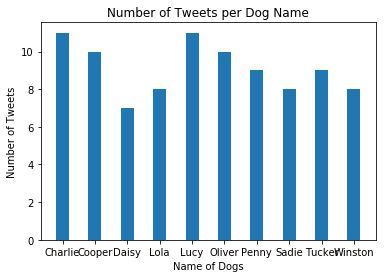

In [63]:
plt.bar(Fav_10.name, Fav_10.tweet_id, width=0.4)
plt.xlabel('Name of Dogs')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Dog Name')
plt.show()

As we can see from the dataframe above, the 10 most popular dog names are, Lucy, Charlie, Oliver, Cooper, Tucker, Penny, Sadie, Winston, Lola and Daisy

## 2. Most rated dog breeds

We are going to get a rating percentage for the dogs by dividing the numerator by the denominator and converting the fractions to percentages

In [64]:
final_archive['rating_percent'] = final_archive.apply(lambda x: (x.rating_numerator / x.rating_denominator)*100, axis=1)

In [65]:
final_archive.rating_percent.sort_values(ascending=False)

1504    17760.000000
674      4200.000000
1259      750.000000
1156      342.857143
2024      270.000000
926       260.000000
1369      140.000000
1927      140.000000
1750      140.000000
177       140.000000
1866      140.000000
1358      140.000000
1354      140.000000
1702      140.000000
1477      140.000000
200       140.000000
1175      140.000000
157       140.000000
1213      140.000000
1342      140.000000
1229      140.000000
1912      140.000000
147       140.000000
1315      140.000000
1296      140.000000
1299      140.000000
142       140.000000
1769      140.000000
1865      140.000000
1774      140.000000
            ...     
464        30.000000
1008       30.000000
970        30.000000
1015       30.000000
40         30.000000
1037       30.000000
103        30.000000
745        30.000000
854        30.000000
72         30.000000
334        30.000000
1210       30.000000
1019       30.000000
791        30.000000
578        30.000000
64         20.000000
128        20

In [66]:
#investigating the one with the highest rating
final_archive.iloc[674]

tweet_id                                             670842764863651840
timestamp                                           2015-11-29 05:52:33
source                                               Twitter for iPhone
text                  After so many requests... here you go.\n\nGood...
expanded_urls         https://twitter.com/dog_rates/status/670842764...
rating_numerator                                                    420
rating_denominator                                                   10
name                                                                NaN
favorite_count                                                     7989
retweet_count                                                      4324
jpg_url                 https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
dog_type                                                           None
breed                                                           Unknown
confidence                                                      

In [67]:
top_10 = pd.DataFrame(final_archive.groupby('breed')['rating_percent'].mean()).sort_values(by= 'rating_percent', ascending=False).head(10)

In [68]:
top_10.reset_index(inplace=True)

In [69]:
top_10

,breed,rating_percent
0,clumber,270.000000
1,Unknown,148.399072
2,Bouvier_des_Flandres,130.000000
3,Pomeranian,125.365854
4,Saluki,125.000000
5,briard,123.333333
6,Tibetan_mastiff,122.500000
7,Border_terrier,121.428571
8,standard_schnauzer,120.000000
9,silky_terrier,120.000000


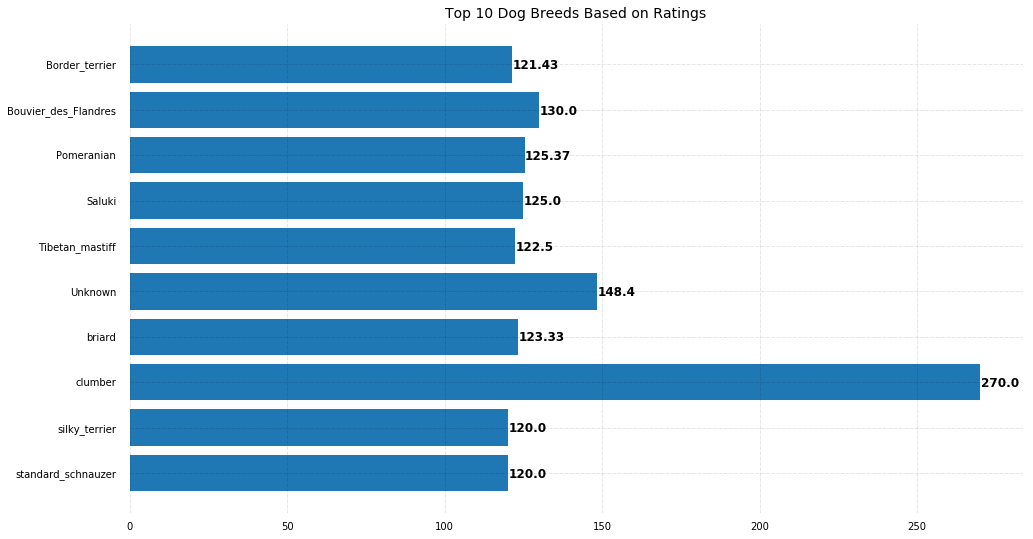

In [70]:
breed = top_10.breed
rating = top_10.rating_percent

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(breed, rating)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible= True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='black')
 
# Add Plot Title
ax.set_title('Top 10 Dog Breeds Based on Ratings',
             loc ='center', fontsize= 14 )
 
# Show Plot
plt.show()

In [71]:
from matplotlib import rcParams
import seaborn as sns
def Barplot(x_data,y_data,data,title,xlabel,ylabel):
    pl = sns.barplot(x = x_data,y = y_data,data = data,color = sns.color_palette('pastel')[0])
    pl.set_title(title,fontsize = 25)
    pl.set_xlabel(xlabel)
    pl.set_ylabel(ylabel)
    rcParams['figure.figsize'] = 18,18
    plt.show()

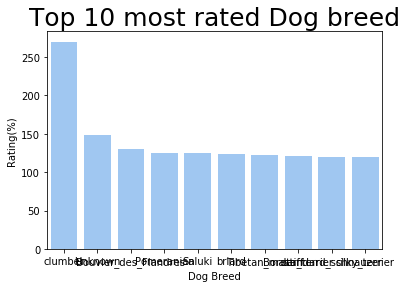

In [72]:
Barplot('breed','rating_percent',top_10,'Top 10 most rated Dog breed','Dog Breed','Rating(%)')

## 3. relationship between favorite_count and retweet_count 

Next, we shall find out the correlation between the likes(favourites) and the retweets on the tweets

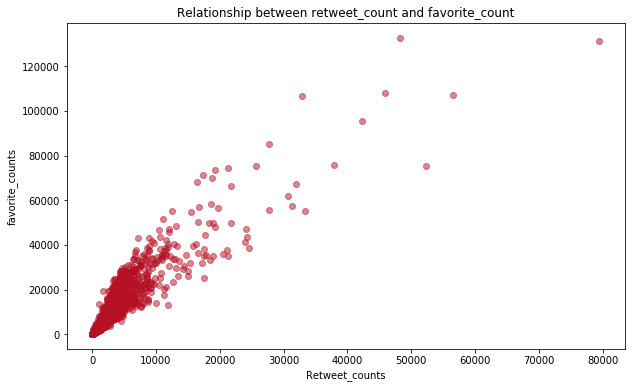

In [73]:
x= final_archive.retweet_count
y= final_archive.favorite_count
plt.figure(figsize=(10,6))
plt.scatter(x,y, color= '#B51024', alpha = 0.5)
plt.title('Relationship between retweet_count and favorite_count', {'fontsize': 12})
plt.xlabel("Retweet_counts")
plt.ylabel("favorite_counts")
plt.show()

**As we can see clearly, there's a positive correlation between the favourites and the retweets**

## 4. monthly trend of interactions with WeRateDogs's posts?

Let's say that the interactions are the sum of the favorites and retweets on each tweet

In [74]:
final_archive['interactions'] = final_archive.retweet_count + final_archive.favorite_count
final_archive.interactions.head()

0     723.0
1     415.0
2     740.0
3    1453.0
4     423.0
Name: interactions, dtype: float64

In [75]:
final_archive.info()
#converting to datetime
final_archive.timestamp = pd.to_datetime(final_archive.timestamp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 16 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1404 non-null object
favorite_count        2097 non-null float64
retweet_count         2097 non-null float64
jpg_url               1971 non-null object
dog_type              2097 non-null object
breed                 2097 non-null object
confidence            2097 non-null float64
rating_percent        2097 non-null float64
interactions          2097 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 262.2+ KB


In [76]:
monthly_tweet_activity = final_archive.groupby(final_archive['timestamp'].dt.to_period('M'))['interactions'].mean()

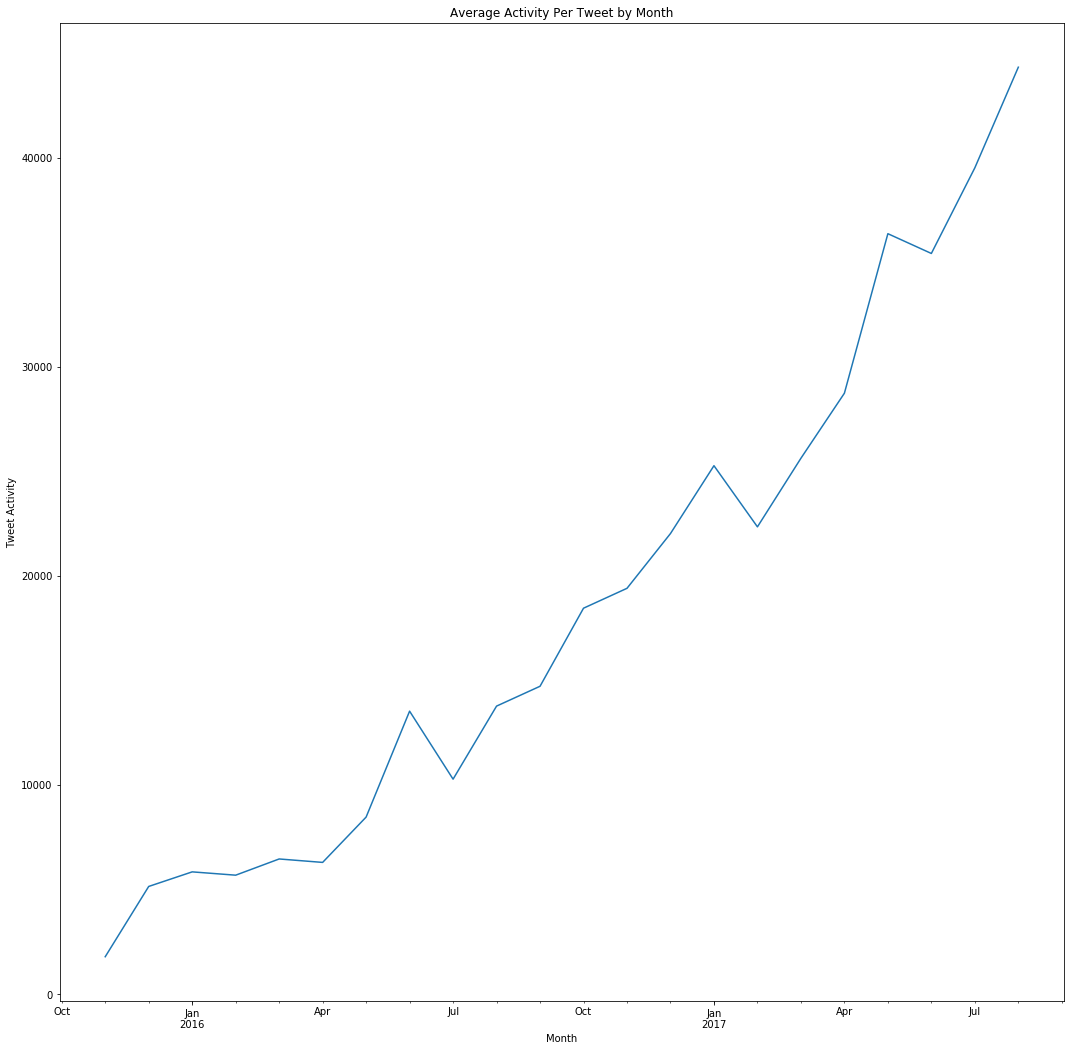

In [77]:
monthly_tweet_activity.plot()
plt.title('Average Activity Per Tweet by Month')
plt.xlabel('Month')
plt.ylabel('Tweet Activity');

The interactions on the page are on an upward trend since the inception of the account 

<a id='conclusion'></a>
# Conclusion

1. The 10 most popular dog names are, Lucy, Charlie, Oliver, Cooper, Tucker, Penny, Sadie, Winston, Lola and Daisy
2. The Top 10 dog breeds according to percentage ratings are Clumber	, Bouvier_des_Flandres	, Pomeranian	, Saluki, briard	,	Tibetan_mastiff, 	Border_terrier, standard_schnauzer and silky_terrier
3. There's a positive correlation between the likes (favourites) and the retweets
4. The interactions on the page are on an upward trend since the inception of the account which implies Account Growth 


<a id='sources'></a>
# Sources

- [Panda Documentation](https://pandas.pydata.org/docs/)
- [Geeks For Geeks](https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/)
- [Working with json in python](realpython.com/python-json/)
- [Working with datetime in pandas](towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587)
- [Drop rows based on certain conditions](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/)
- [Seaborn documentation](seaborn.pydata.org/tutorial/introduction.html)
- [Matplotlib documentation](https://matplotlib.org/stable/index.html)